# K-Means Clustering

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans

# Load the Dataset 

In [135]:
iris = datasets.load_iris()

In [136]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [137]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [138]:
iris.target_names #multiclass classification

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [139]:
X = iris.data

# This data is generally used for supervised ML since it has output/target value also. We shall use only input features
# data for this Unsupervised K means clustering. 

In [140]:
# Since K means works based on distance it's recommended to do standard scaling.

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [141]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [142]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [143]:
# Let's consider only 2 columns for now. Keeping only 3rd and 4th column. Dropping 1st and 2nd column. 

df.drop(['sepal length (cm)','sepal width (cm)'], axis = 1, inplace = True)

In [144]:
df.head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


# Build the Model

# For K = 2

In [145]:
k=2

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [146]:
# We will take a look at the centroid that the algorithm found:

center = kmeans.cluster_centers_
center

array([[-1.30498732, -1.25489349],
       [ 0.65249366,  0.62744675]])

In [147]:
kmeans.labels_  # i.e target values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

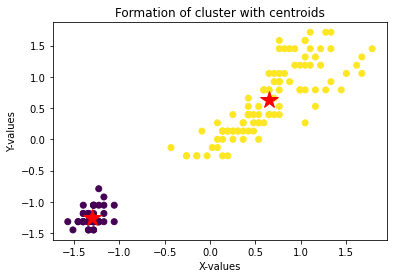

In [148]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# For K = 3

In [149]:
k=3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [150]:
center = kmeans.cluster_centers_
center

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

In [151]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

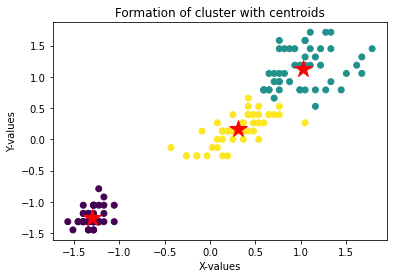

In [152]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# For K = 4

In [153]:
k=4

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [154]:
center = kmeans.cluster_centers_
center

array([[-1.30498732, -1.25489349],
       [ 0.76459173,  0.71848526],
       [ 0.22415599,  0.09803464],
       [ 1.19009152,  1.34645099]])

In [155]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1], dtype=int32)

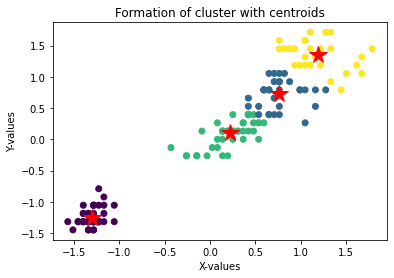

In [156]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# For K = 5

In [157]:
k=5

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

In [158]:
center = kmeans.cluster_centers_
center

array([[-1.30498732, -1.25489349],
       [ 0.86901955,  0.84790204],
       [ 0.50404998,  0.32768849],
       [ 0.05599722, -0.03918442],
       [ 1.17426124,  1.38564813]])

In [159]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 1, 4, 1, 4, 4, 2, 1, 1, 4,
       1, 1, 4, 1, 4, 4, 1, 4, 4, 2, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4,
       4, 2, 2, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1], dtype=int32)

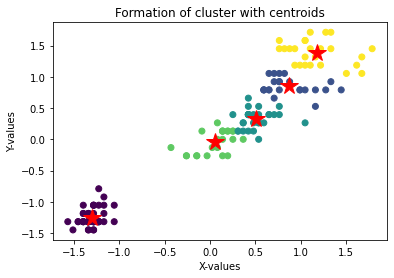

In [160]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# Find Best Value for K - Elbow Method

In [161]:
SSE = []

index = range(1,10)

for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
# Here the metric inertia is nothing but the mean squared distance between each instance and its closest centroid.

300.0000000000001
54.16878133149559
18.026962612544075
12.283372197379125
9.14533766127183
7.1883187029750575
6.011187013148224
5.2350241041056105
4.520416396085354


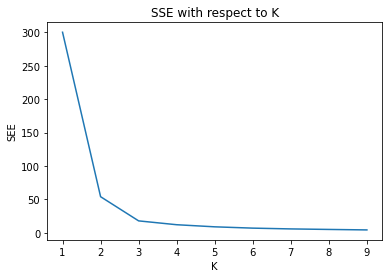

In [162]:
plt.plot(index, SSE)

plt.xlabel('K')
plt.ylabel('SEE')
plt.title('SSE with respect to K')
plt.show()

In [163]:
# we can see that after K =3 there is no other sharp elbow, hence K = 3 is the best value for K.

# Also from the inputdata set we know that there are 3 categories of target values, hence elbow method works. 

In [164]:
# We considered only 2 columns since it's difficult to plot scatter plot with more than 2 or 3 input features i.e 
# beyong 2 or 3 dimentions it's not possible to visulaize the output cluster. 

# But in real world we will have many input features, one way to see the cluster or visualization is by reducing
# the higher dimention to 2D by doing PCA. 

# Considering All 4 Features - Without PCA:

In [198]:
iris = datasets.load_iris()

X = iris.data

scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [199]:
# Find the Best value for K

SSE = []

index = range(1,10)

for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

600.0
222.36170496502302
139.82049635974974
114.41256181896094
90.92751382392049
80.0224959955744
71.81624598106144
62.28749580350205
54.8110520315013


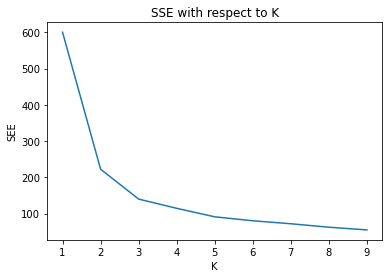

In [200]:
plt.plot(index, SSE)

plt.xlabel('K')
plt.ylabel('SEE')
plt.title('SSE with respect to K')
plt.show()

# After 3, there is no major drop, hence 3 looks best. 5 can be taken but the different between those clusters will be
# very minimal

In [201]:
k=3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [202]:
center = kmeans.cluster_centers_
center

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [203]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

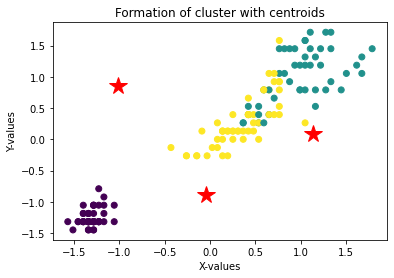

In [204]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)
    

# we can see that plot doesn;t looks correct. This is because we have 4 input features to decide the cluster but
# we have done the plotting using 2 features. We cannot do the plotting using all 4 features, hence need to do PCA now.

# Considering All 4 Features - Model Fitting Before PCA and Plotting After PCA:

In [166]:
iris = datasets.load_iris()

X = iris.data

scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [167]:
# we know that best value for K is 3

k=3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [168]:
center = kmeans.cluster_centers_
center

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [169]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

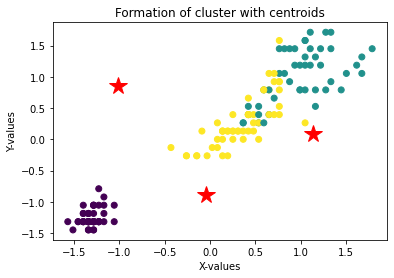

In [170]:
# Now plotting the dataset and each centroid.

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)
    

# we can see that plot doesn;t looks correct. This is because we have 4 input features to decide the cluster but
# we have done the plotting using 2 features. We cannot do the plotting using all 4 features, hence need to do PCA now.

In [171]:
from sklearn.decomposition import PCA

In [174]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


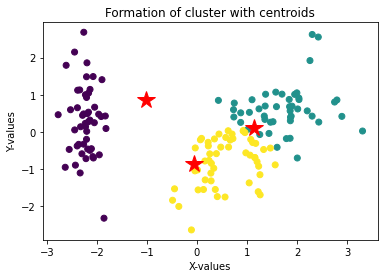

In [175]:
# Now plotting the dataset and each centroid.

plt.scatter(results['pca1'], results['pca2'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)
    

# this is also not so perfect because the model we trained with 4 columns before PCA. 

# Considering All 4 Features - Model Fitting after PCA and Plotting after PCA:

In [176]:
# Lets fit the model with PCA performed data set

k=3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(results)

KMeans(n_clusters=3, random_state=42)

In [177]:
center = kmeans.cluster_centers_
center

array([[ 0.57262144, -0.80720888],
       [-2.22475316,  0.28892745],
       [ 1.72103664,  0.60288719]])

In [178]:
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

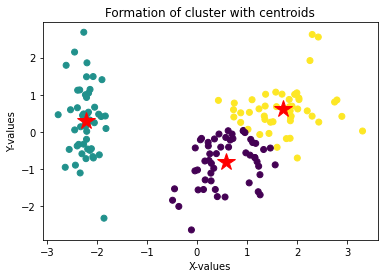

In [179]:
# Now plotting the dataset and each centroid.

plt.scatter(results['pca1'], results['pca2'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# This looks ok.

In [180]:
SSE = []

index = range(1,10)

for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(results)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

574.8792432000106
197.40381604541298
115.02075663594022
89.36805047698057
66.19222901462221
56.829188638726684
47.71734996142809
39.19474121304431
32.08819241107449


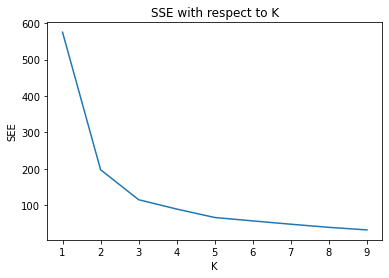

In [181]:
plt.plot(index, SSE)

plt.xlabel('K')
plt.ylabel('SEE')
plt.title('SSE with respect to K')
plt.show()

In [ ]:
# For transformed data set also the elbow plot shows the best value for K is 3 
# but since there is a little bend at 5, so lets try with K=5 now.

In [182]:
k=5

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(results)

KMeans(n_clusters=5, random_state=42)

In [183]:
center = kmeans.cluster_centers_
center

array([[ 0.28852652, -1.32193893],
       [-2.22674001,  1.00558345],
       [ 2.08990873,  0.860935  ],
       [-2.22276631, -0.42772855],
       [ 0.99160332, -0.09673218]])

In [184]:
kmeans.labels_ 

array([1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 2, 4, 2, 2, 0, 2, 4, 2,
       2, 4, 2, 0, 4, 2, 4, 2, 2, 0, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

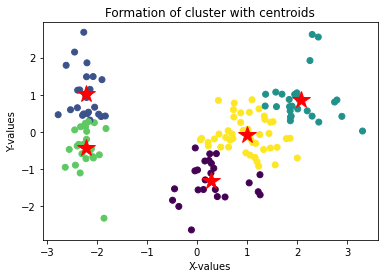

In [185]:
# Now plotting the dataset and each centroid.

plt.scatter(results['pca1'], results['pca2'], c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)
    

# Actually 5 also looks meaningful. Now to decide whether we need 3 cluster or 5 clusters will be business decision
# and needs functional understanding. Here as i don't have much knowledge of flower types so instead of having additional
# 2 clusters with minimal difference (minimal elbow drop) better to stick with 3 cluster (perfect elbow drop)

In [206]:
'''
So the learning here is, 

1) If number of features are more than 2 and if need to visualizate the cluster then need to do PCA and then fit the 
model.

2) If number of features are more than 2 and if no need to visualizate the cluster then its not mandatory to do PCA,
directly can proceed to fit the model. 

3) In both of the above cases, the best value for K majorly comes same, but in some cases it may differ. 
'''

'\nSo the learning here is, \n\n1) If number of features are more than 2 and if need to visualizate the cluster then need to do PCA and then fit the \nmodel.\n\n2) If number of features are more than 2 and if no need to visualizate the cluster then its not mandatory to do PCA,\ndirectly can proceed to fit the model. \n\n3) In both of the above cases, the best value for K majorly comes same, but in some cases it may differ. \n'